In [ ]:
#@title Установка нужных версий библиотек
!wget 'https://drive.google.com/uc?export=download&id=1oSFOP0j25OZAuhD8YXxyQXNTdr2lUdtn' -O requirements.txt
!pip install -r requirements.txt

Linear Regression: MSE = 3051.78
Lasso (L1): MSE = 3037.40
Ridge (L2): MSE = 3048.72


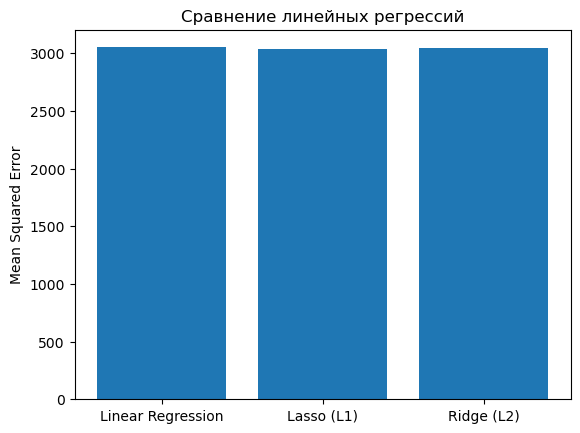

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_blobs
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Генерация данных с помощью make_regression
# np.random.seed()  # Комментарий для отключения фиксированного сида
n_samples = 100
n_features = 3
X, y, coef = make_regression(n_samples=n_samples, n_features=n_features, n_informative=1, coef=True)

# Генерация выбросов с помощью make_blobs
n_outliers = 10
X_outliers, y_outliers = make_blobs(n_samples=n_outliers, centers=1, cluster_std=5, n_features=n_features, random_state=42)

# Объединение основного набора данных и выбросов
X = np.vstack((X, X_outliers))
y = np.hstack((y, y_outliers))

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Модели
models = {
    'Linear Regression': LinearRegression(),
    'Lasso (L1)': Lasso(alpha=1),
    'Ridge (L2)': Ridge(alpha=1)
}

# Обучение моделей и оценка качества
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse
    print(f"{name}: MSE = {mse:.2f}")

# Визуализация результатов
plt.bar(results.keys(), results.values())
plt.ylabel('Mean Squared Error')
plt.title('Сравнение линейных регрессий')
plt.show()

In [40]:
A = np.array([[1, 2],
              [3, 4]])
A@A

array([[ 7, 10],
       [15, 22]])

In [37]:
np.einsum('iii->i', A)

array([ 0.21385597, -0.71459047])

Точность Лапласовского классификатора: 0.68
Точность Гауссовского классификатора: 0.72


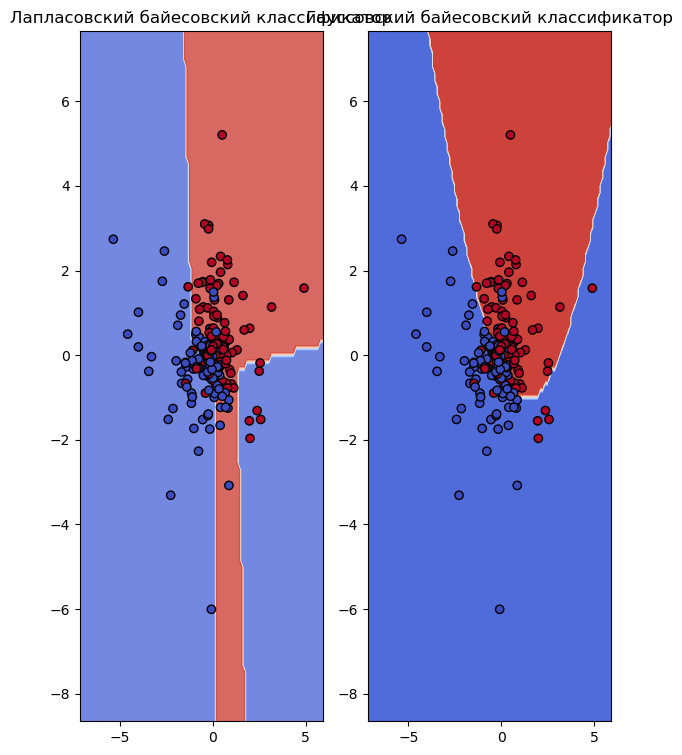

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class LaplaceNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}
        
        # Вычисление параметров для каждого класса
        for c in self.classes:
            X_c = X[y == c]
            self.parameters[c] = {
                'loc': np.mean(X_c, axis=0),
                'scale': np.std(X_c, axis=0)
            }

    def predict(self, X):
        posteriors = []
        for x in X:
            posterior = []
            for c in self.classes:
                prior = np.mean(y == c)  # вероятность класса
                likelihood = np.prod(laplace.pdf(x, loc=self.parameters[c]['loc'], scale=self.parameters[c]['scale']))
                posterior.append(prior * likelihood)
            posteriors.append(self.classes[np.argmax(posterior)])
        return np.array(posteriors)

# Генерация данных
# np.random.seed(42)
n_samples = 1000

# Генерация основной части данных с распределением Лапласса
X_outer = np.random.laplace(0, 1, (n_samples // 2, 2))
y_outer = (X_outer[:, 0] + X_outer[:, 1] > 0).astype(int)

# Создание центральной "капли" с перемешанными значениями
X_inner = np.random.laplace(0, 0.2, (n_samples // 2, 2))  # "капля" с меньшей дисперсией
y_inner = np.random.choice([0, 1], n_samples // 2)  # Случайные классы

# Объединение основной части и "капли"
X = np.vstack((X_outer, X_inner))
y = np.hstack((y_outer, y_inner))

# Разделение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение Лапласовского классификатора
laplace_nb = LaplaceNaiveBayes()
laplace_nb.fit(X_train, y_train)
y_pred_laplace = laplace_nb.predict(X_test)

# Обучение Гауссовского байесовского классификатора
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred_gaussian = gaussian_nb.predict(X_test)

# Оценка точности
accuracy_laplace = accuracy_score(y_test, y_pred_laplace)
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
print(f"Точность Лапласовского классификатора: {accuracy_laplace}")
print(f"Точность Гауссовского классификатора: {accuracy_gaussian}")

# Визуализация областей предсказаний для Лапласовского классификатора
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z_laplace = laplace_nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z_laplace = Z_laplace.reshape(xx.shape)
Z_gaussian = gaussian_nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z_gaussian = Z_gaussian.reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(x_max, y_max))

axs[0].contourf(xx, yy, Z_laplace, alpha=0.8, cmap=plt.cm.coolwarm)
axs[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.coolwarm)
axs[0].set_title('Лапласовский байесовский классификатор')

# Гауссовский байесовский классификатор
axs[1].contourf(xx, yy, Z_gaussian, cmap=plt.cm.coolwarm)
axs[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.coolwarm)
axs[1].set_title('Гауссовский байесовский классификатор')

plt.tight_layout()  # Оптимизация расположения графиков
plt.show()


/home/rokoko/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


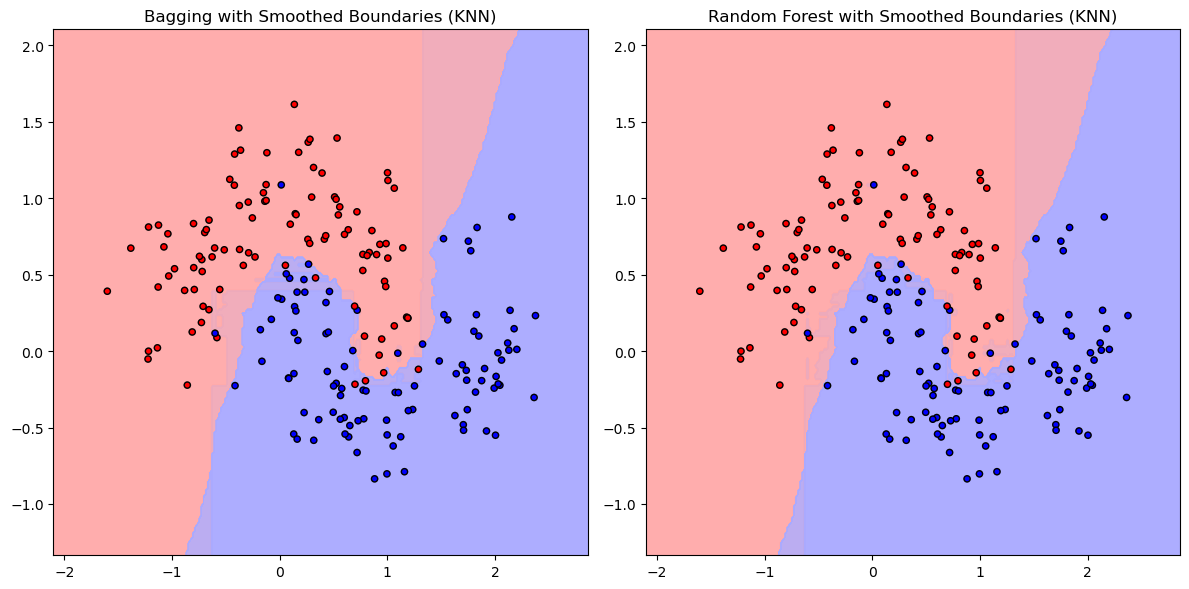

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# Генерация данных
X, y = make_moons(n_samples=200, noise=0.25, random_state=42)

# Создаем сетку для отображения областей классификации
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Функция для отрисовки границ
def plot_decision_boundary(model, X, y, ax, title):
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

# Модели: Бэггинг и Рандомный лес
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Построение графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

plot_decision_boundary(bagging_model, X, y, ax1, "Bagging")
plot_decision_boundary(random_forest_model, X, y, ax2, "Random Forest")

# Добавление сглаживающей пунктирной линии
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10)

# Для сглаживания границ применим KNN
plot_decision_boundary(knn_model, X, y, ax1, "Bagging with Smoothed Boundaries (KNN)")
plot_decision_boundary(knn_model, X, y, ax2, "Random Forest with Smoothed Boundaries (KNN)")

plt.tight_layout()
plt.show()


# [SOURCE](https://www.youtube.com/watch?v=KJA9A1q9l7E&list=PLkJJmZ1EJno4H9OfRksHNJgyjXyYcjFtB&index=2&t=1s)
## Линейная регрессия

**Линейная регрессия** — модель зависимости переменной от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости.

Ниже на графике представлена линейная регрессия переменной $y$ от переменной $x$.

Есть коэффициент наклона $a$ и есть коэффициент сдвига $b$.

Эти значения могут изменяться как угодно.

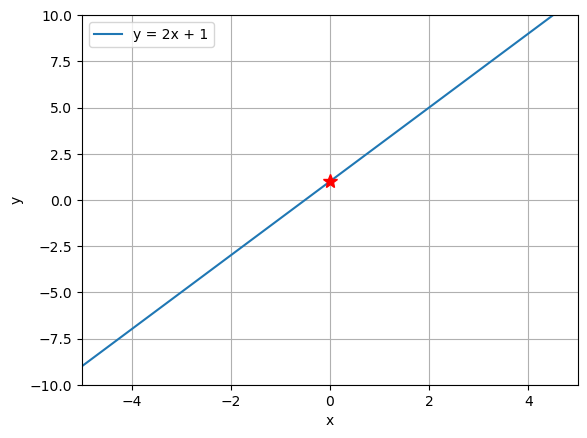

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-6, 6)
a = 2
b = 1

y = a * x + b
plt.plot(x, y, label=f'y = {a}x + {b}')
plt.plot([0], [b], 'r*', markersize=10)
plt.ylabel('y');plt.xlabel('x')
plt.ylim(-10, 10);plt.xlim(-5, 5)
plt.grid()
plt.legend();

In [14]:
def draw_ax(a, b, x, ax, ylim=5):
    y = a * x + b
    ax.plot(x, y, label=f'y = {a}x + {b}')
    ax.plot([0], [b], 'r*', markersize=10)

    ax.plot([0, 1], [b, b], 'y', linewidth=4)
    ax.plot([1, 1], [b, b+a], 'y', linewidth=4)

    ax.set_ylabel('y'); ax.set_xlabel('x')
    ax.set_ylim(-ylim, ylim); ax.set_xlim(-5, 5)
    ax.grid()
    ax.legend(prop={'size': 15})

**Сдвиг**:
- Если у нас не будет сдвига (коэффициента $b$), то линяя будет проходить через точку (0, 0).
- Если коэффициент сдвига не равен 0, а к примеру, равен 2, то линяя будет проходить через точку (0, 2).

**Коэффициент наклона**:
- Если у нас не будет коэффициента наклона, то линяя будет параллельна оси Ох.
- Если коэффициент наклона больше 0, то линяя идет на увеличение, при этом чем больше коэффициент, тем более наклон крутой.
- Если коэффициент наклона меньше 0, то линяя идет на уменьшение, при этом чем меньше коэффициент, тем более наклон крутой.



AttributeError: 'int' object has no attribute 'write'

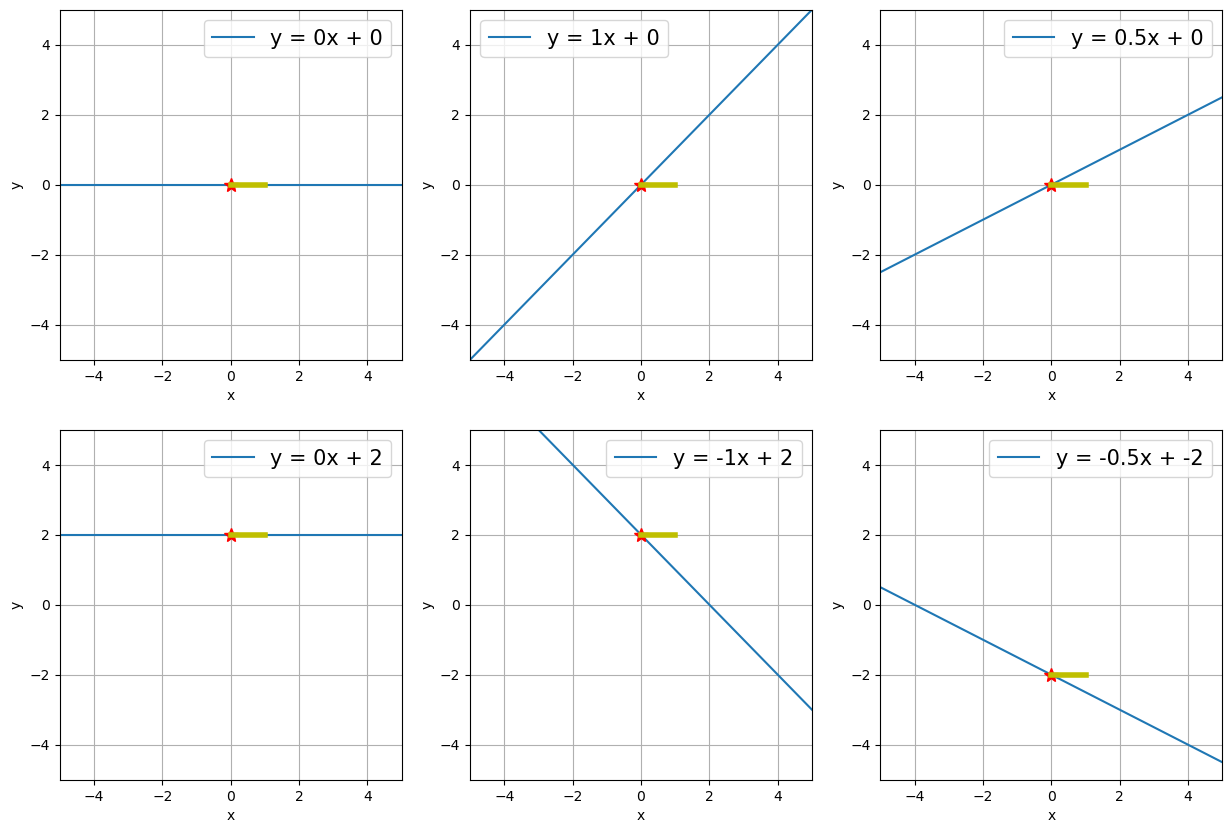

In [26]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(2, 3, figsize=(15, 10))
x = np.arange(-6, 6)

# 1row, 1column
a, b = 0, 0
draw_ax(a, b, x, ax[0][0])

# 1row, 2column
a, b = 1, 0
draw_ax(a, b, x, ax[0][1])

# 1row, 3column
a, b = 0.5, 0
draw_ax(a, b, x, ax[0][2])


# 2row, 1column
a, b = 0, 2
draw_ax(a, b, x, ax[1][0])

# 2row, 2column
a, b = -1, 2
draw_ax(a, b, x, ax[1][1])

# 2row, 3column
a, b = -0.5, -2
draw_ax(a, b, x, ax[1][2])

С самим уравнением прямой разобрались, теперь давайте обучим линейную регрессию, ведь по факту она и есть прямая.

## Получение данных

Возьмем и сами нагенирируем себе данные и обучим на них линейную модель.

In [214]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1000, n_informative=1,
                       noise=10)

display(X, y)

array([[ 0.56859533, -1.86836887,  0.36412025, ...,  0.56358531,
        -1.43026945, -0.46724266],
       [ 1.55230272,  0.55270946, -0.63284709, ..., -0.22088946,
        -1.6710375 , -0.92474077],
       [-1.26832513, -0.72584373,  0.7868518 , ...,  0.43693137,
        -0.95247252,  0.05013859],
       ...,
       [ 1.03022261,  0.16875993,  0.61454094, ...,  0.42941788,
         0.62928346,  1.21922333],
       [-0.97839839,  0.54402443, -0.96382478, ...,  0.18711119,
         0.43520149,  1.08234997],
       [-2.3575592 , -0.586355  , -1.63424127, ..., -0.42238102,
        -0.61441854,  0.33425725]])

array([  6.29928648,  -2.57887122, -23.09513558,  37.34841256,
       -12.85152031,   6.02218583,   1.6901336 ,   9.68199031,
       -12.9164161 ,   6.46870669,   6.35203677,  11.27023571,
         1.90861196,   3.05180856,  26.67164589, -18.59369515,
       -23.29443092, -12.40703369,  -0.32431558, -17.23676354,
        18.85836878, -19.21186953, -12.31532219,  17.93393715,
       -20.19822024,  -6.14147114,  -2.39948113,  12.39607259,
         8.34479198, -10.05831729,   4.09589565,   4.73045001,
         0.1678302 , -11.42281859,  -6.77730498,  -1.74234977,
         4.12007499,   8.59347647, -13.12008644, -11.74021949,
         9.42192908,   2.90921657,   4.90031215,  -1.78625751,
        21.0697819 , -18.35343017,  14.19822588,  -1.51363368,
        -5.11271581,  10.58008574, -27.05427209,  15.38148865,
         7.94405343,  -5.9325619 ,  -2.11928462,  -3.40331715,
        -2.92674363,   3.5770526 ,  -4.6522223 ,  22.6321721 ,
         1.99060329, -20.53886964,  11.89682756,  31.58

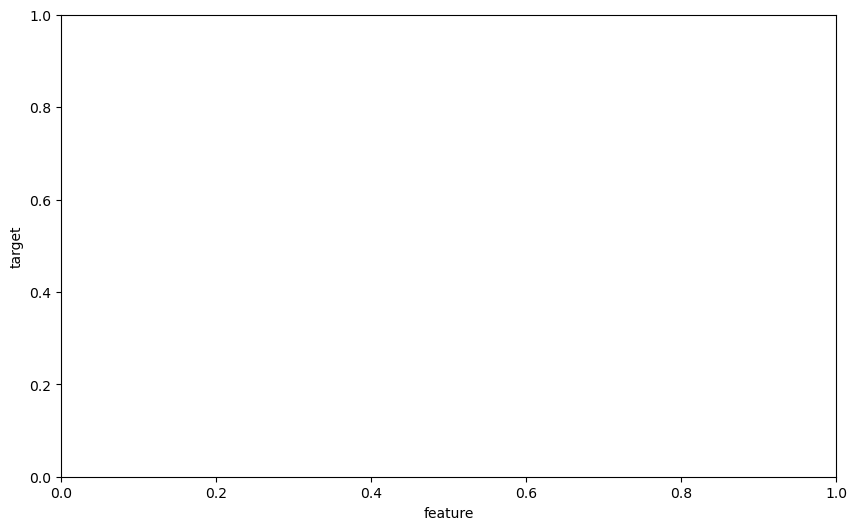

In [160]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y)

plt.xlabel('feature')
plt.ylabel('target')
plt.show()

## Одномерная линейная регрессия

#### Из sklearn

Возьмем модель `LinearRegression` из `sklearn` из модуля `linear_model`.

In [169]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# model.set_params(fit_intercept=False)
model

LinearRegression()

In [199]:
X[:, :1]

array([[-2.78232142],
       [-0.40033167],
       [ 1.80571748],
       [-0.1369134 ],
       [-0.08292681],
       [ 0.31858969],
       [ 0.23861106],
       [ 0.03974554],
       [ 0.75477058],
       [-1.90282446],
       [ 0.9407453 ],
       [-1.25911048],
       [-0.86704191],
       [-1.06620942],
       [-0.64928204],
       [ 1.24882488],
       [-1.22220315],
       [-0.58471436],
       [-1.54839158],
       [-0.75259721],
       [ 0.89129332],
       [-0.62165278],
       [ 0.14873054],
       [ 0.57588504],
       [ 0.64655852],
       [ 0.95850293],
       [ 1.84024617],
       [-0.71353124],
       [ 0.08221001],
       [-0.82622358],
       [-0.3010233 ],
       [-1.78923364],
       [-0.90846409],
       [ 1.06111024],
       [-0.73009876],
       [-0.11757718],
       [-0.40021858],
       [-0.11941565],
       [-2.04621488],
       [ 0.84646856],
       [ 0.53357694],
       [-1.32903442],
       [-0.42824165],
       [ 0.85831212],
       [ 0.7321688 ],
       [-0

И передадим в неё в метод `fit` данные, которые получили выше.

In [217]:
model.fit(X[:, :1], y)

LinearRegression()

Всё, модель обучилась, это происходит очень быстро. Обучение линейной модели заключается в поиске коэффициентов, конкретно в нашей задаче - это коэффициент сдвига и наклона.

Можем эти коэффициента отобразить, если возьмем у модели атрибут `coef_` и `intercept_`.

In [176]:
model.coef_, model.intercept_

(array([-2.49660714e-01, -5.60887965e-01,  6.77890454e-02,  2.06698254e-01,
         1.80914450e-01,  1.74753371e-01, -1.89561891e-01, -3.07417515e-01,
         1.53277517e-01,  5.67613098e-01,  1.72403797e-01,  2.99382280e-01,
        -4.30180886e-01,  6.12435704e-01,  1.33428300e-01,  5.33550539e-02,
         5.02656739e-01, -2.55859376e-01,  3.68707078e-01,  3.60030047e-01,
         9.68939947e-01, -2.74330011e-01, -1.41313409e-01,  2.02688678e-01,
         3.86147089e-01, -8.27908122e-02,  2.42861803e-01, -1.78522079e-01,
         4.67484888e-01, -4.90856643e-01, -3.70259772e-01,  6.07405348e-03,
         1.32352839e-01,  1.68563891e-01, -7.40600564e-01,  6.60463964e-02,
         2.81079409e-01, -3.31404633e-01, -3.13913828e-01,  6.97924071e-02,
        -2.26335437e-02, -2.49417396e-01,  1.22005831e-01, -5.53811007e-01,
        -6.68418966e-01,  4.88274831e-01,  2.00061182e-01,  2.29018547e-01,
        -1.22077945e-02,  7.23101160e-02,  9.17799894e-02, -1.04441616e-01,
        -2.1

Вот и получили два коэффициента, осталось их подставить в уравнение прямой и будет готовая линейная модель.

In [218]:
model_a = model.coef_[0]
model_b = model.intercept_

Данная прямая наилучшим образом прошла вдоль точек из обучающей выборки.

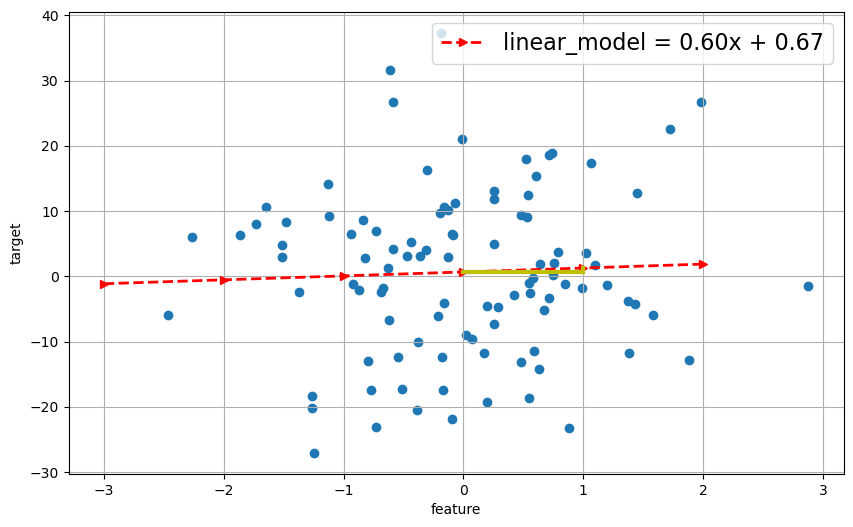

In [220]:
fig = plt.figure(figsize=(10, 6))

x = np.arange(-3, 3)
model_y_sk = model_a * x + model_b

plt.plot(x, model_y_sk, '-->r', linewidth=2, label=f'linear_model = {model_a:.2f}x + {model_b:.2f}')
plt.scatter(X[:, 1, np.newaxis], y)
plt.plot([0, 1], [model_b, model_b], 'y', linewidth=3)
plt.plot([1, 1], [model_b, model_b+model_a], 'y', linewidth=3)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

    Чтобы теперь сделать предсказания этой моделью достаточно вызвать метод `predict` и передать в него данные.

In [80]:
model.predict(X[:1])

array([25.7815605])

Или же можем можем сделать точно такое же предсказание, если возьмем коэффициент наклона и умножим на значение признака и прибавим к этому коэффициент сдвига.

In [ ]:
model_a * X[:1] + model_b

А что значит это "наилучшим образом вдоль точек из обучающей выборки"? Как подсчитался этот наилучший образ?

Чем построенная линия ниже, хуже первой?

In [ ]:
fig = plt.figure(figsize=(10, 6))

x = np.arange(-3, 3)
a, b = 50, 0
model_y = a * x + b

plt.plot(x, model_y, linewidth=2, c='r', label=f'linear_model = {a:.2f}x + {b:.2f}')
plt.scatter(X, y)
plt.plot([0, 1], [b, b], 'y', linewidth=3)
plt.plot([1, 1], [b, b+a], 'y', linewidth=3)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

А визуально она допускает больше отклонений от синих точек, чем первая. Давайте сравним не визуально, а с помощью цифр.

Для начала составим все данные в одну таблицу:
- `X` - это точки, на которых строим модель
- `y` - это настоящая целевая переменная, которую хотим предсказать
- `pred_model_good` - это значения на линии по координатам `X` первой модели, имеем предсказания модель `LinearRegression`
- и `pred_bad_model` - это значения на линии по координатам `X` второй модели, которая создана вручную, а не силами `sklearn`

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'X': X[:,0],
    'y': y,
    'pred_good_model': model_a * X[:,0] + model_b,
    'pred_bad_model': a * X[:,0] + b
})


df.head()

In [130]:
y

array([ -56.99942387,   21.31430203,    3.10373097,   -3.2938454 ,
         20.05835038,   70.63043709,  -99.76045539,   77.95107072,
         -8.54647998,    5.57523033,  -11.8731786 ,  -73.29845213,
         63.27496453,    3.98698241,   -2.34801448,  -18.04570208,
         -6.29412647,  -74.00599034,   16.74304551,    8.18744063,
        -96.15998097,   13.98171318,  -48.71916574,   16.96770095,
         71.70049567,   89.76927638,   28.18310477,   12.22721867,
         44.04166556,   25.34283727,   61.17932637,  -52.84695608,
         80.522918  ,   -5.04080931,   25.04178094,  -38.53499823,
         30.23411865,    2.41031985,  -22.73646236,  -22.12787158,
         -2.89325703,  -63.05970174,  113.01733642,    3.61466867,
         48.2326405 ,   29.09495194,  -72.17513858,   70.16221351,
       -155.43635874,  -25.16504147,   34.30402819,  -35.80464862,
         11.58127342,   38.33954518,   15.71367979,  -67.55845048,
        -88.46492645,   -2.24781983,   57.44011851,  -21.30683

In [223]:
np.mean((model.predict(X[:, 1, np.newaxis]) - y) ** 2)

163.636937623643

Посчитаем отклонения предсказаний от истины для каждой модели.

И здесь на первых 5 объектах тоже видим, что на `sklearn` модели более маленькие отклонения, нежели на второй модели.

In [ ]:
df['residual_good'] = df['pred_good_model'] - df['y']
df['residual_bad'] = df['pred_bad_model'] - df['y']
df.head()

Давайте теперь на всех объектах посчитаем метрику, которая будет позволять оценивать качество построенных линий.

Возьмем MSE - mean squared error, более подробно про неё рассказываю в этом [видео](https://youtu.be/vh2smjQyhp8) и в этом [ноутбуке](https://colab.research.google.com/drive/14Oxi6sI25mP4JbovLiJ57e7H5sbN2I3p).

MSE на sklearn модели равняется.

In [ ]:
np.mean(df['residual_good'] ** 2)

А MSE на второй модели равняется:

In [ ]:
np.mean(df['residual_bad'] ** 2)

В разы больше, чем на первой модели.

### Как обучается линейная регрессия

*Как же модель из `sklearn` умудрилась построить такие качественные предсказания?* Ведь у неё была куча вариантов построения, можно менять коэффициенты наклона и сдвига как угодно.

Ответ на вопрос - **методы оптимизации**.

Ведь ошибка MSE тоже своего рода функция, которая меняется от коэффициента сдвига и наклона.

Можем взять по 100 разных значений коэффициентов сдвига и наклона и посчитать в них MSE и отобразить на трехмерном графике.

Так же отобразим и коэффициента, подобранные моделью из sklearn и наши коэффициенты.

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def mse(w1, w0):
    y_pred = w1 * X[:, 0] + w0
    return np.mean((y - y_pred) ** 2)


coefs_a = np.linspace(50, 100, num=100)
coefs_b = np.linspace(-10, 10, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i, j) for i, j in zip(np.ravel(w1), np.ravel(w0))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w1, w0, Z, alpha=.5)
ax.scatter(model_a, model_b, mse(model_a, model_b), c='r', s=5)
ax.scatter(a, b, mse(a, b), c='r', s=5)

ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_0$')
ax.set_zlabel('MSE')

plt.show()

И видим, что дейстивительно, модель с коэффициентом `a` равным где-то 80, и с небольшим коэффициентом `b` лучше, чем модель с коэффициентом `a=50`, ведь ошибка у второй модели выше, чем у первой.



#### Градиентный спуск

*Как модель дошла до самой лучшей точки?*

А она обучалась с помощью градиентного спуска - это метод оптимизации.

**Обсудим, что такое градиент и зачем надо спускаться.**

_Градиентом_ функции $f$ называется $n$-мерный вектор из частных производных.

$$ \nabla f(x_{1},...,x_{d}) = \left(\frac{\partial f}{\partial x_{i}}\right)^{d}_{i=1}.$$

К примеру, если функция зависит от трех переменных: $F(x, y, z)$, то её градиент будет равен

$$\nabla f(x, y, z) = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z}) $$

При этом, __градиент задает направление наискорейшего роста функции__. Значит, антиградиент будет показывать направление ее скорейшего убывания, что будет полезно нам в нашей задаче минимизации функционала ошибки.

**Градиентный спуск** — метод нахождения локального минимума с помощью движения вдоль градиента.

Давайте попробуем реализовать программно градиентный спуск, чтобы лучше понять как он работает.

Зададим две функции:
1. func - функция параболы $f(x) = x^2$
2. gr_func - производная функции параболы $\nabla f(x) = 2x$

In [137]:
def func(x):
    return x ** 2

# функция градиента
def gr_func(x):
    return 2 * x

Можем отрисовать эту функцию на графике.

Действительно видим параболу.

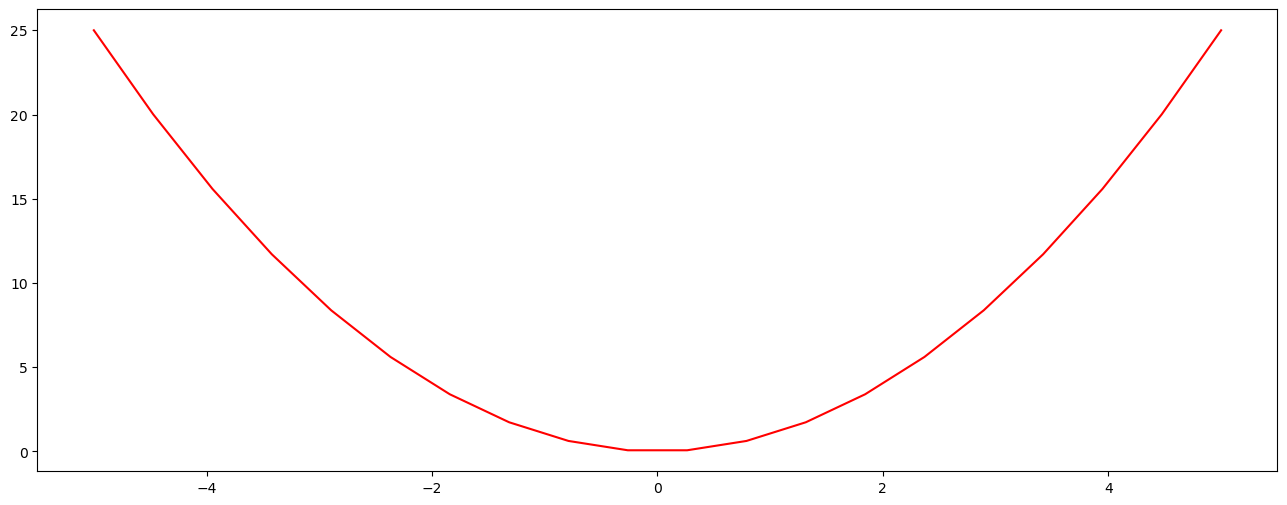

In [138]:
# для картинки
D = 5

X = np.linspace(-D, +D, 20)
Y = func(X)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)');

Чтобы найти минимум этой функции мы можем воспользоваться методом оптимизации - градиентный спуск, для этого нужно задать начальную точку, откуда будем считать градиенты и скатываться в минимум.

Зеленая звездочка - это и есть точка старта.

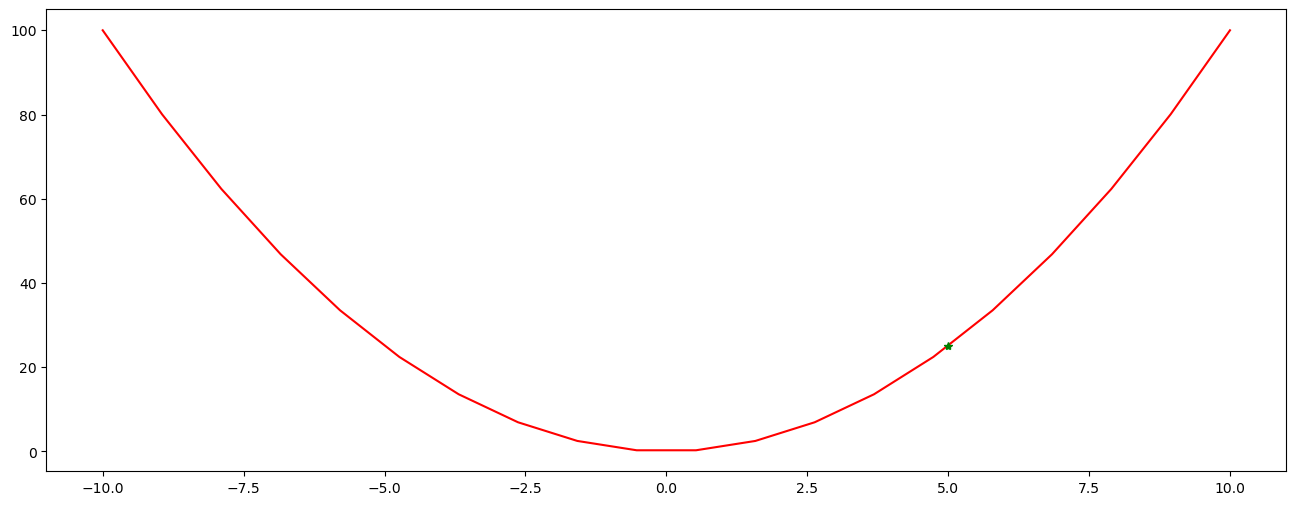

In [139]:
# первоначальное точка
start_point = 5

# для картинки
D = 10

X = np.linspace(-D, +D, 20)
Y = func(X)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '-*g', label = 'GD');

Теперь в этой точке можем посчитать градиент.

Он равняется 10, т.к. начальная точка равна 5, а производная будет равняться $\nabla f(x) = 2\cdot x = 2 \cdot 5 = 10$  

In [140]:
grad = gr_func(start_point)
grad

10

Можем отрисовать направление градиента, он показывает наискорейший рост функции и действительно видим, зеленый вектор идет вверх.

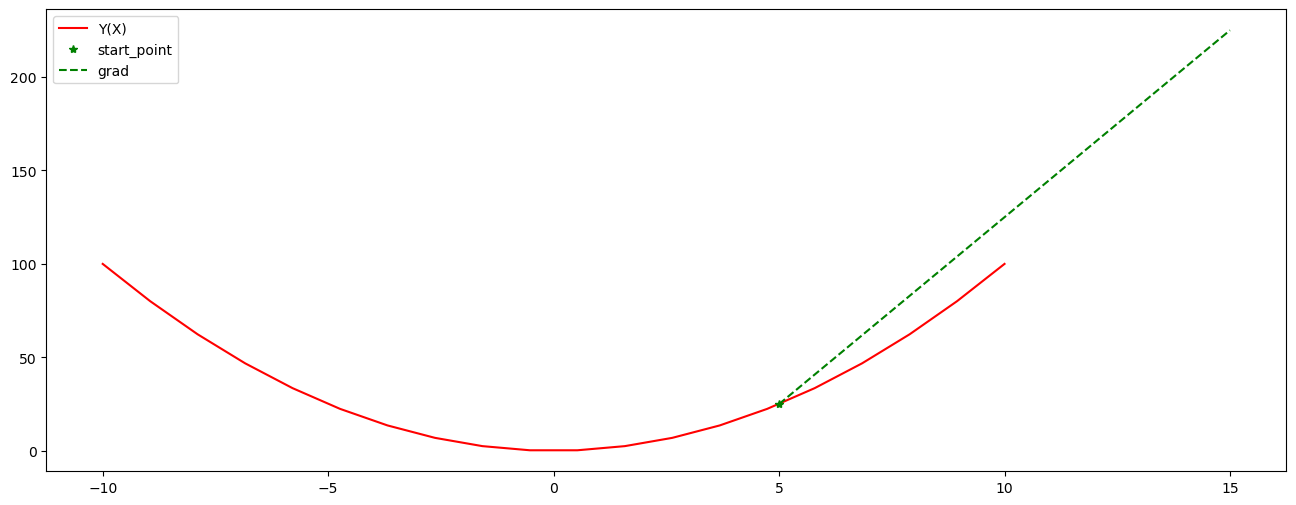

In [141]:
plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '*g', label='start_point')

next_point_1 = start_point + grad
plt.plot([start_point, next_point_1], func(np.array([start_point, next_point_1])), '--g', label='grad')
plt.legend();

Но если будем двигаться по этому вектору, то к минимуму функции не придем, поэтому нужно идти в противоположгном направлении, а значит брать **антиградиент**.

Но если мы пойдем от текущей точке $5$ в сторону антиградиента $-10$, то окажемся в точке $-5$, а это так же удалено от минимума, как и наша стартовая точка.

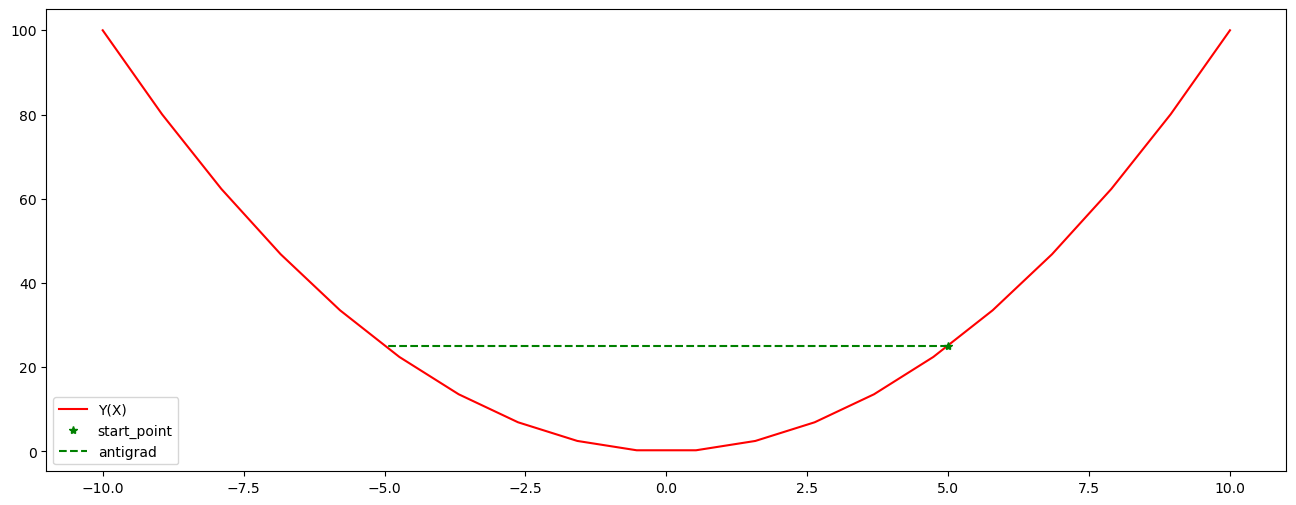

In [142]:
plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '*g', label='start_point')

next_point_1 = start_point - grad
plt.plot([start_point, next_point_1], func(np.array([start_point, next_point_1])), '--g', label='antigrad')
plt.legend();

Поэтому чтобы не перескакивать минимальное состояние функции мы можем делать шаг в сторону антиградиента не полностью, а только на какую-то долю, для этого нужно ввести значения **шага обучения** (скорость обучения, learning rate) - это значения, замедляющее шаги градиентного спуска, чтобы не пропустить локальный минимум.

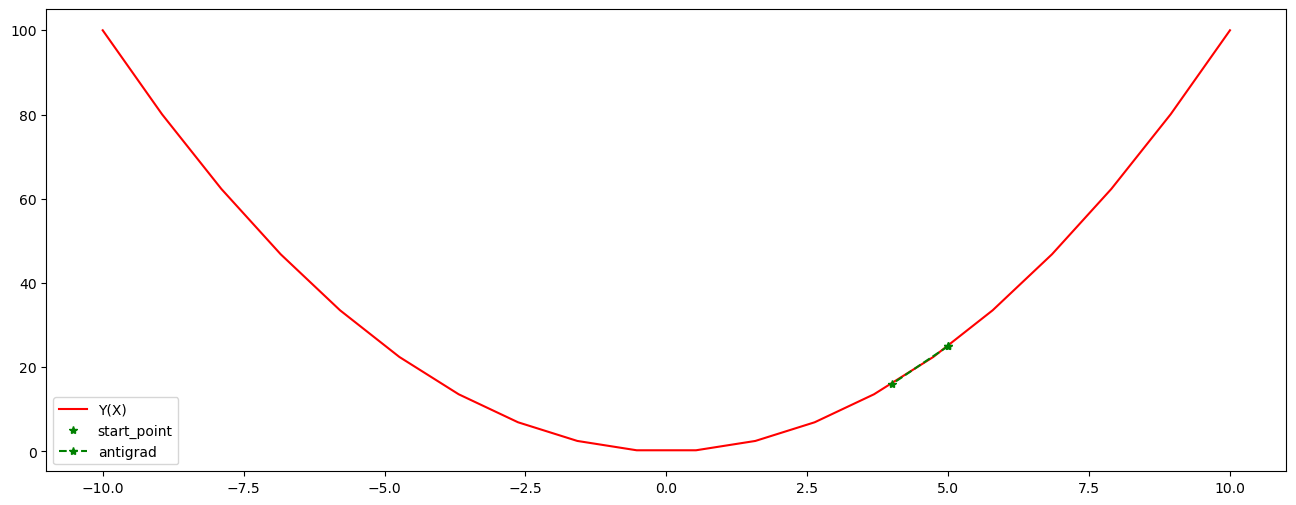

In [143]:
# размер шага (learning rate)
learning_rate = 0.1

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '*g', label='start_point')

next_point_1 = start_point - learning_rate * grad
plt.plot([start_point, next_point_1], func(np.array([start_point, next_point_1])), '--*g', label='antigrad')
plt.legend();

Вот мы и получили новую точку с координатой $x=4$.

Теперь в этой точке можем снова рассчитать значение градиента.

In [ ]:
curr_point = next_point_1
curr_point

In [ ]:
grad = gr_func(curr_point)
grad

Отрисуем направление градиента, который показывает наискорейший рост функции.

А синим пометим уже пройденный шаг.

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '*g', label='start_point')
plt.plot([start_point, next_point_1], func(np.array([start_point, next_point_1])), '--*b', label='prev step')

next_point_2 = curr_point + grad

plt.plot([curr_point, next_point_2], func(np.array([curr_point, next_point_2])), '--g', label='grad')
plt.legend();

Но если будем двигаться по этому вектору, то к минимуму функции не придем, поэтому нужно идти в противоположном направлении, а значит брать **антиградиент**.

Но при этом помним, что если сходить на полный антиградиент, то можем перелететь минимум, поэтому домножим на скорость обучения.

In [ ]:
# размер шага (learning rate)
learning_rate = 0.1

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, func(start_point), '*g', label='start_point')
plt.plot([start_point, next_point_1], func(np.array([start_point, next_point_1])), '--*b', label='prev step')

next_point_2 = curr_point - learning_rate * grad
plt.plot([curr_point, next_point_2], func(np.array([curr_point, next_point_2])), '--*g', label='antigrad')
plt.legend();

И получаем еще одну точку, которая уже ближе к минимуму функции.

Оформим небольшой цикл для градиентного спуска.

In [ ]:
# первоначальное точка
start_point = 5

# размер шага (learning rate)
learning_rate = 0.1

# начальная точка
next_point = start_point

x = []
x.append(next_point)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')

# количество итерация
n = 10
for i in range(n):
    current_point = next_point

    # движение в негативную сторону вычисляемого градиента
    next_point = current_point - learning_rate * gr_func(current_point)
    x.append(next_point)
    # print(next_point)

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {current_point}| Следующая точка {next_point}")
    print("--------------------------------------------------------")



print(f"минимум {next_point}, количество затраченных итераций: {i}")
X_grad = np.array(x)
plt.plot(X_grad, func(X_grad), '-*g', label = 'GD')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Прошли 10 шагов и практически находимся в минимуме функции.

А если мы сделаем больше итераций, то наверняка алгоритм сойдется к 0.


In [ ]:
# первоначальное точка
start_point = 5

# размер шага (learning rate)
learning_rate = 0.1

# начальная точка
next_point = start_point

x = []
x.append(next_point)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')

# количество итерация
n = 100
for i in range(n):
    current_point = next_point

    # движение в негативную сторону вычисляемого градиента
    next_point = current_point - learning_rate * gr_func(current_point)
    x.append(next_point)

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {current_point}| Следующая точка {next_point}")
    print("--------------------------------------------------------")



print(f"минимум {next_point}, количество затраченных итераций: {i}")
X_grad = np.array(x)
plt.plot(X_grad, func(X_grad), '-*g', label = 'GD')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Но здесь значения самой лучшей минимальной точки на последних шагах очень похожи и на самом деле мы могли не ждать столько итераций и выйти из цикла раньше.

Для этого введем значение eps, с помощью которого будем проверять разницу между текущей точкой и следующей точкой и если она меньше eps (а значит точки очень близки), то можем выйти из алгоритма.

In [ ]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# первоначальное точка
start_point = 5

# размер шага (learning rate)
learning_rate = 0.1

# начальная точка
next_point = start_point

x = []
x.append(next_point)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')

# количество итерация
n = 100
for i in range(n):
    current_point = next_point

    # движение в негативную сторону вычисляемого градиента
    next_point = current_point - learning_rate * gr_func(current_point)
    x.append(next_point)

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {current_point}| Следующая точка {next_point}")
    print("--------------------------------------------------------")

    if(abs(current_point - next_point) <= eps):
        break

print(f"минимум {next_point}, количество затраченных итераций: {i}")
X_grad = np.array(x)
plt.plot(X_grad, func(X_grad), '-*g', label = 'GD')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

И да, алгоритму понадобилось всего лишь 42 итерации, разница между двумя точками оказалась меньше `eps`, а значит можем выйти из цикла схождения алгоритма - это называется критерий останова.

#### Алгоритм градиентного спуска

1. Инициализация начальной точки
2. Цикл по k = 1,2,3,...:

- $ w_{k} = w_{k-1} - \eta\nabla f(w_{k-1}) $

- Если $||w_{k} - w_{k-1}|| < \epsilon$, то завершить.


### Своя реализация линейной регрессии


Теперь зная, как работает метод оптимизации градиентный спуск, можем вернуться к задаче обучения линейной регрессии, но уже не с помощью `sklearn`, а вручную.

Берем те же самые данные, но вдобавок еще возвращем коэффициент наклона (коэффициент сдвига по умолчанию в такой генерации равен 0).

In [ ]:
X, y, coeffs = make_regression(n_samples=50, n_features=1, n_informative=1,
                               noise=10, coef=True, random_state=11)

display(X, y)

In [ ]:
coeffs

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y)

plt.xlabel('feature')
plt.ylabel('target')
plt.show()

Функция, которую здесь оптимизируем - это MSE, её график для конкретно нашей задачи рисовали выше.

    Реализуем две функции:
1. mserror - функция среднеквадратичной ошибки:
$MSE = \frac{1}{n}\sum_{i=0}^n{(y_i - y_{\text{pred},i})^2} = \frac{1}{n}\sum_{i=0}^n{(y_i - (w_1\cdot X_i + w_0))^2} = \frac{1}{n}\sum_{i=0}^n{(y_i - w_1\cdot X_i - w_0)^2}$


2. gr_mserror - градиент функции MSE. Распишем его отдельно для коэффициента сдвига и коэффициента наклона:

Сдвиг:
$\frac{∂ MSE}{∂ w_0} = \frac{2}{n}\sum (y_i - y_{\text{pred},i}) \cdot (-1)$

Наклон:
$\frac{∂ MSE}{∂ w_1} = \frac{2}{n}\sum (y_i - y_{\text{pred},i}) \cdot (-X_i)$


In [ ]:
# функция, определяющая среднеквадратичную ошибку
def mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.sum((y - y_pred) ** 2) / len(y_pred)

# функция градиента
def gr_mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.array([2/len(X)*np.sum((y - y_pred)) * (-1),
                     2/len(X)*np.sum((y - y_pred) * (-X[:, 0]))])

И остается запустить цикл градиентного спуска.

В начале инициализировали коэффициенты, затем на каждом шаге считаем градиент, умножаем его на шаг обучения и вычитаем его из предыдущих значений коэффициентов и так далее пока не поймем, что точки коэффициентов очень похожи друг на друга на соседних итерациях.

In [ ]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# первоначальное точка
w1 = 0
w0 = 0

# размер шага (learning rate)
learning_rate = 0.1

next_w1 = w1
next_w0 = w0
# количество итерация
n = 100
for i in range(n):
    cur_w1 = next_w1
    cur_w0 = next_w0

    # движение в негативную сторону вычисляемого градиента
    next_w0 = cur_w0 - learning_rate * gr_mserror(X, cur_w1, cur_w0, y)[0]
    next_w1 = cur_w1 - learning_rate * gr_mserror(X, cur_w1, cur_w0, y)[1]

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {cur_w1, cur_w0}| Следующая точка {next_w1, next_w0}")
    print(f"MSE {mserror(X, cur_w1, cur_w0, y)}")
    print("--------------------------------------------------------")

    if (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):
        break

А мы получили точно такую же метрику, которая получалась у `LinearRegression` из `sklearn`.

Сравним полученные коэффициенты с теми, которые были сгенерированы вместе с данными.

In [ ]:
print('Коэффициенты наклона', end=' ')
print(f'True {coeffs}, trained {next_w1}')

print('Коэффициенты сдвига', end=' ')
print(f'True 0, trained {next_w0}')

А они очень похожи.

А визуализированные кривые наслаиваются друг на друга

In [ ]:
fig = plt.figure(figsize=(10, 6))

x = np.arange(-3, 3)
our_model_y = next_w1 * x + next_w0

plt.plot(x, model_y_sk, linewidth=4, alpha=0.5, c='r', label=f'sklearn linear_model = {model_a:.2f}x + {model_b:.2f}')
plt.plot(x, our_model_y, '--g', linewidth=2, label=f'our linear_model = {next_w1:.2f}x + {next_w0:.2f}')
plt.scatter(X, y)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

## Многомерная линейная регрессия

Сейчас мы посмотрели на то, как обучается линейная регрессия для задач с одним признаком.

Построим себе данные поинтересней, состоящие из 4 признаков, это уже отрисовать не сможем.



In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=50, n_features=4, n_informative=4,
                       noise=10, random_state=11)

display(X, y)

### Из sklearn

Обучим для начала модель из `sklearn`

In [ ]:
model = LinearRegression()
model.fit(X, y)

Посмотрим обученные коэффициенты и теперь давайте их называть весами.

Есть веса при признаках - это и есть коэффициенты наклона но по каждой оси.

И есть один свободный вес - коэффициент сдвига.

Получаем 4 веса при признаках - значения для каждого признака, которые сообщают, насколько нужно наклонить прямую относительно каждой оси.

И один сдвиг - свободный вес.

In [ ]:
model.coef_, model.intercept_

Можем сделать предсказания этой моделью, сначала через метод `predict`.

In [ ]:
model.predict(X[:1])

А теперь с помощью перемножения весов на признаки, суммирования их и добавления свободного веса.

In [ ]:
np.sum(model.coef_ * X[0]) + model.intercept_

Давайте посчитаем ошибку на предсказаниях модели, при этом получим предсказания не одним способом (через `model.predict`), а еще и вторым, сами перемножим веса (`model.coef_`) на значения признаков (`X`) и добавим значение сдвига (`model.intercept_`)

Выходит, что неважно, как мы получаем предсказания они всё равно одинаковые.

In [ ]:
df = pd.DataFrame(X)
df['y'] = y
df['pred_fit'] = model.predict(X)
df['pred_dot'] = X.dot(model.coef_) + model.intercept_

df.head()

Посчитаем отклонения предсказаний от истины.

In [ ]:
df['residual'] = df['pred_fit'] - df['y']
df.head()

И на всех объектах считаем метрику MSE - mean squared error, напомню, что более подробно про неё рассказываю в этом [видео](https://youtu.be/vh2smjQyhp8) и в этом [ноутбуке](https://colab.research.google.com/drive/14Oxi6sI25mP4JbovLiJ57e7H5sbN2I3p).

MSE равняется.

In [ ]:
np.mean(df['residual'] ** 2)

### Своя реализация линейной регрессии

Берем те же самые данные, где брали 4 признака, но еще возвращаем веса при признаках, а свободный вес по умолчанию в такой генерации равен 0.

In [ ]:
X, y, coeffs = make_regression(n_samples=50, n_features=4, n_informative=4,
                               noise=10, coef=True, random_state=11)

display(X, y)

In [ ]:
coeffs

Для удобства реализации градиентного спуска от записи поэлементной через сумму ($MSE = \frac{1}{n}\sum_{i=0}^n{(y_i - y_{\text{pred},i})^2}$) перейдем к матричной форме записи.

Предсказания линейной модели - это перемножение весов на признаки плюс свободный вес.

$$y_{pred} = X\cdot w + w_0$$

При этом очень важно, чтобы соблюдались размерности матрицы $X$ и вектора $w$.
У нас размерности равны

In [ ]:
X.shape, coeffs.shape

А значит, чтобы объеты могли матрично перемножиться, нужно чтобы количество столбцов первой матрицы было равно количеству строк второй (но у нас не матрица, а вектор).

У нас совпадают, так что можем их перемножать и получаем ничто иное, как *скалярное произведение* - все значения в признаках перемножаются на соответсвующие веса и складываются.


А значит можем переписать формулу:
$$y_{pred} = \langle X, w\rangle + w_0$$


Но вот только мешается свободный вес. Можно пойти на одну хитрость и добавить фиктивный признак в данные, который для каждого объекта равен 1.



In [ ]:
X = np.column_stack([X, np.ones((50))])
X

И теперь всё предсказание линейной модели будет равняться:

$$y_{pred} = \langle X, w\rangle$$


А наша ошибка MSE преобразиться и будет выглядить следующим образом:

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - y_{\text{pred}_i})^{2} = \frac{1}{n}\sum_{i=1}^{n}(y_{i} -  \langle X_i, w\rangle)^{2} =  \frac{1}{n}||Y -  Xw||^{2}$$


где используется $L_{2}$ норма:

$$||Y -  X w|| = \sqrt{\sum_{i=1}^n{(y_i-X_iw)^2}} $$

$$MSE = \frac{1}{n}\sqrt{\sum_{i=1}^n{(y_i-X_iw)^2}} ^{2} = \frac{1}{n}\sum_{i=1}^n{(y_i-X_iw)^2}$$



Реализуем две функции только уже с матричными операциями:
1. mserror_mat - функция среднеквадратичной ошибки для матриц


2. gr_mserror_mat - градиент функции MSE для матрицы:

$\frac{∂ MSE}{∂ w} = \frac{1 \cdot 2}{n}({Y - Xw}) \cdot-X$



In [ ]:
# функция, определяющая среднеквадратичную ошибку
def mserror_mat(X, w, y):
    y_pred = X @ w
    return np.sum((y - y_pred) ** 2) / len(y_pred)

# функция градиента
def gr_mserror_mat(X, w, y):
    y_pred = X @ w
    return 2/len(X)*(y - y_pred) @ (-X)

И остается запустить цикл градиентного спуска.

В начале инициализировали коэффициенты. Т.к. у нас 5 признаков (4 настоящих плюс один фиктивный), то будет 5 весов.

In [ ]:
# первоначальное точка
weights = np.zeros(X.shape[1])
weights

Затем запускаем цикл по обучению и меняем веса, при этом не каждый вес отдельно, а все веса сразу вместе.

И если веса начнут плохо изменяться, то можем выйти по критерию останова:

$$||w_{new} - w_{old}|| ≤ eps$$

In [ ]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# размер шага (learning rate)
learning_rate = 0.1

next_weights = weights
# количество итерация
n = 100
for i in range(n):
    cur_weights = next_weights

    # движение в негативную сторону вычисляемого градиента
    next_weights = cur_weights - learning_rate * gr_mserror_mat(X, cur_weights, y)

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {cur_weights}| Следующая точка {next_weights}")
    print(f"MSE {mserror_mat(X, cur_weights, y)}")
    print("--------------------------------------------------------")

    if np.linalg.norm(cur_weights - next_weights, ord=2) <= eps:
        break

Вышли раньше из обучения, т.к. веса перестали сильно изменяться и мы стали топтаться на одном месте.

И получили точно такую же метрику, которая получалась у `LinearRegression` из `sklearn`.

И давайте сравним полученные коэффициенты с теми, которые были сгенерированы вместе с данными.

In [ ]:
print('Веса при признаках')
print(f'True {coeffs},\nTrained {next_weights[:-1]}')

print('\nВес свободный', end=' ')
print(f'True 0, trained {next_weights[-1]}')

## Практика
Практика доступна на платформе https://boosty.to/machine_learrrning/posts/f3212700-6f98-4c2f-9627-7629d9d8114d

Доступна
1. по подписке уровня light+ и выше
2. разовая оплата


## Summary

Вот мы и разобрались, как обучается модель линейная регрессия
1. Для одного признака
    - Ищется вес при признаке, он же коэффициент наклона y=**a**x + b
    - Ищется свободный вес, он же коэффициент сдвига y=ax + **b**
2. Для большого количества признаков
    - Ищутся веса при признаках, они же коэффициенты наклона для каждого признака y=X**w** + w_0
    - Ищется свободный вес, он же коэффициент сдвига y=Xw + **w_0**
    - При этом свободный вес можно положить в матричное перемножение Xw, если создадим фиктивный признак
3. Обучение линейной регрессии производится с помощью **градиентного спуска**
    - Градиент - вектор частных производных
    - Градиентный спуск - итеративный процесс нахождения минимума функции

Муррр ♥

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Создание сетки
x = np.linspace(-3.0, 3.0, 100)
y = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Построение графика
plt.contourf(X, Y, Z, levels=20, cmap='viridis', edgecolor='black')
plt.colorbar()  # Добавляет цветовую шкалу
plt.show()
